**ABSA Case Study**

To tackle the tasks outlined in the ABSA case study, I'll proceed step-by-step through each requirement, beginning with the development of the ABSA model. I'll first load and analyze the provided dataset to understand its structure and content. After that, I will build and train an ABSA model to extract aspect terms, determine aspect polarity, and identify aspect categories. Let's begin by examining the dataset.

**Step 1: Load and Explore the Dataset:**: I'll start by loading the provided dataset and inspecting its structure in different ways. This will help us understand how the annotations are organized and how to preprocess the data for model training.

**Step 2: Data Preprocessing:** Next, I'll preprocess the data to extract relevant information for each review, including the sentences, aspect terms, aspect categories, and sentiment polarity.

**Step 3: ABSA Model Development:** I'll develop the ABSA model with the following components:

    a. Aspect Term Extraction: Identify aspect terms in the text.
    b. Aspect Term Polarity Detection: Determine the sentiment polarity (positive, negative, neutral, conflict) for each aspect term.
    c. Aspect Category Detection: Classify aspect terms into predefined categories (e.g., food, service, price).

**Step 4: Results Analysis:** After training the model, I'll analyze the results by visualizing the overall sentiment distribution and category-wise sentiment distribution using matplotlib/plotly.

**Step 5: Actionable Insights:** Based on the analysis, I'll derive actionable insights and recommendations for the restaurant to improve overall customer satisfaction.

**Step 6: Reporting:** Finally, I'll document the approach, findings, pros and cons, and potential improvements in a Jupyter notebook and PowerPoint presentation.

# Loading and exploring the dataset

In [58]:
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element

# Loading the dataset
file_path = r"C:\Users\bindroo\Restaurants_Train_v2.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Explore the structure of the data set

for review in root.findall('sentence'):
    text = review.find('text').text
    print("Review Text:", text)
    
    for aspect_term in review.findall('aspectTerms/aspectTerm'):
        term = aspect_term.get('term')
        polarity = aspect_term.get('polarity')
        print(f"Aspect Term: {term}, Polarity: {polarity}")

    for aspect_category in review.findall('aspectCategories/aspectCategory'):
        category = aspect_category.get('category')
        polarity = aspect_category.get('polarity')
        print(f"Aspect Category: {category}, Polarity: {polarity}")
    print("-----")
    break # prints only the first review for inspection
    
        


Review Text: But the staff was so horrible to us.
Aspect Term: staff, Polarity: negative
Aspect Category: service, Polarity: negative
-----


In [59]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_aspects(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    # Identify aspect terms: we consider nouns (NN, NNS) and compound nouns (NNP, NNPS)
    aspect_terms = []
    for word, pos in pos_tags:
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']:
            aspect_terms.append(word)
    
    return aspect_terms

# Example usage
for sample in data[:5]:
    print(f"Text: {sample['text']}")
    print(f"Extracted Aspects: {extract_aspects(sample['text'])}")


Text: But the staff was so horrible to us.
Extracted Aspects: ['staff']
Text: To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora.
Extracted Aspects: ['redeeming', 'factor', 'food', 'average', 'deficiencies', 'Teodora']
Text: The food is uniformly exceptional, with a very capable kitchen which will proudly whip up whatever you feel like eating, whether it's on the menu or not.
Extracted Aspects: ['food', 'kitchen', 'eating', 'menu']
Text: Where Gabriela personaly greets you and recommends you what to eat.
Extracted Aspects: ['Gabriela', 'greets']
Text: For those that go once and don't enjoy it, all I can say is that they just don't get it.
Extracted Aspects: []


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bindroo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bindroo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Prepare data
texts = []
polarities = []
for sample in data:
    for aspect in sample['aspects']:
        texts.append(sample['text'])
        polarities.append(aspect['polarity'])

# Convert polarities to numeric
polarities_num = [1 if p == 'positive' else -1 if p == 'negative' else 0 for p in polarities]

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = polarities_num

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"Aspect Term Polarity Detection Accuracy: {accuracy}")


Aspect Term Polarity Detection Accuracy: 0.699594046008119


C:\Users\bindroo\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
# Example mapping of aspect terms to categories for demonstration
aspect_to_category = {
    'food': 'food',
    'service': 'service',
    'price': 'price',
    'ambience': 'ambience',
    'staff': 'service',
    'menu': 'food',
    'environment': 'ambience',
    'cost': 'price',
    'value': 'price',
    'experience': 'anecdotes/miscellaneous',
    'quality': 'food',
    'taste': 'food',
    'flavor': 'food',
    'waiter': 'service',
    'music': 'ambience',
    'decor': 'ambience',
    'cleanliness': 'ambience'
}

# Prepare data with proper categories
aspect_terms = []
aspect_categories = []
for sample in data:
    for aspect in sample['aspects']:
        term = aspect['term'].lower()  # Normalize to lowercase
        category = aspect_to_category.get(term, 'anecdotes/miscellaneous')
        aspect_terms.append(term)
        aspect_categories.append(category)

# Encode categories
le = LabelEncoder()
y_categories = le.fit_transform(aspect_categories)

# Vectorize aspect terms
X_aspect_terms = vectorizer.fit_transform(aspect_terms)

# Split data
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_aspect_terms, y_categories, test_size=0.2, random_state=42)

# Train classifier
clf_cat = LinearSVC()
clf_cat.fit(X_train_cat, y_train_cat)

# Evaluate
accuracy_cat = clf_cat.score(X_test_cat, y_test_cat)
print(f"Aspect Category Detection Accuracy: {accuracy_cat}")


Aspect Category Detection Accuracy: 0.9824086603518268


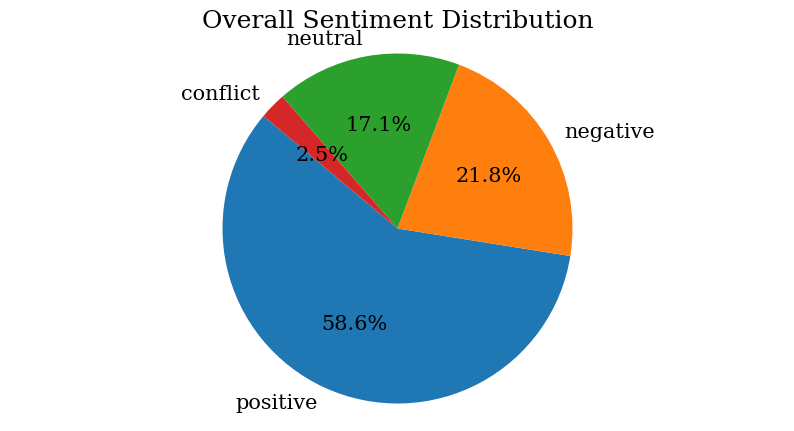

In [51]:
import matplotlib.pyplot as plt

# Count polarities
polarity_counts = {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0}
for sample in data:
    for aspect in sample['aspects']:
        polarity_counts[aspect['polarity']] += 1

# Plot distribution
labels = polarity_counts.keys()
sizes = polarity_counts.values()

plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Overall Sentiment Distribution')
plt.show()


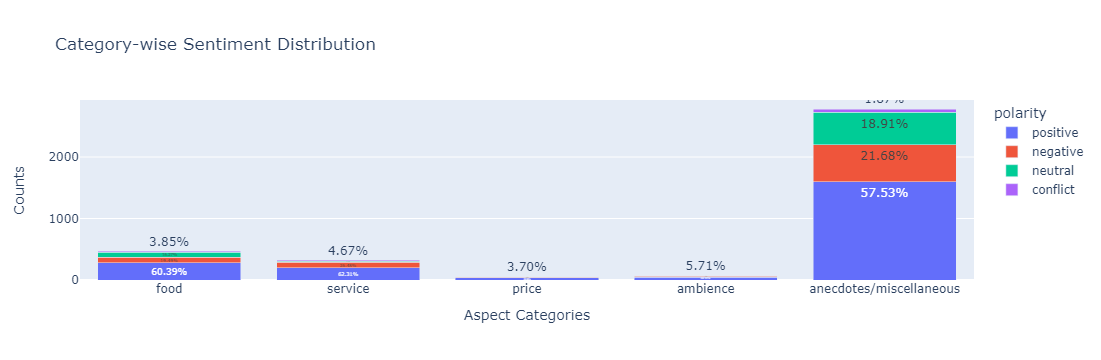

In [70]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Initialize Data Structures
category_polarity_counts = {
    'food': {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0},
    'service': {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0},
    'price': {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0},
    'ambience': {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0},
    'anecdotes/miscellaneous': {'positive': 0, 'negative': 0, 'neutral': 0, 'conflict': 0}
}

# Count polarities for each category
for sample in data:
    for aspect in sample['aspects']:
        term = aspect['term'].lower()
        category = aspect_to_category.get(term, 'anecdotes/miscellaneous')
        polarity = aspect['polarity']
        category_polarity_counts[category][polarity] += 1

# Convert to DataFrame
category_polarity_df = pd.DataFrame.from_dict(category_polarity_counts, orient='index')
category_polarity_df = category_polarity_df.reset_index().rename(columns={'index': 'category'})

# Melt the DataFrame to long format
melted_df = category_polarity_df.melt(id_vars='category', var_name='polarity', value_name='count')

# Calculate percentage for hover info
total_counts = melted_df.groupby('category')['count'].transform('sum')
melted_df['percentage'] = (melted_df['count'] / total_counts) * 100

# Create the plot
fig = px.bar(melted_df, x='category', y='count', color='polarity', text='percentage',
             title='Category-wise Sentiment Distribution', labels={'count': 'Counts'},
             hover_data={'percentage': ':.2f%'})

# Customize hover template to show count and percentage
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', hovertemplate='Category: %{x}<br>Polarity: %{color}<br>Count: %{y}<br>Percentage: %{text:.2f}%<extra></extra>')

# Customize layout
fig.update_layout(barmode='stack', xaxis_title='Aspect Categories', yaxis_title='Counts')

# Show the plot
fig.show()


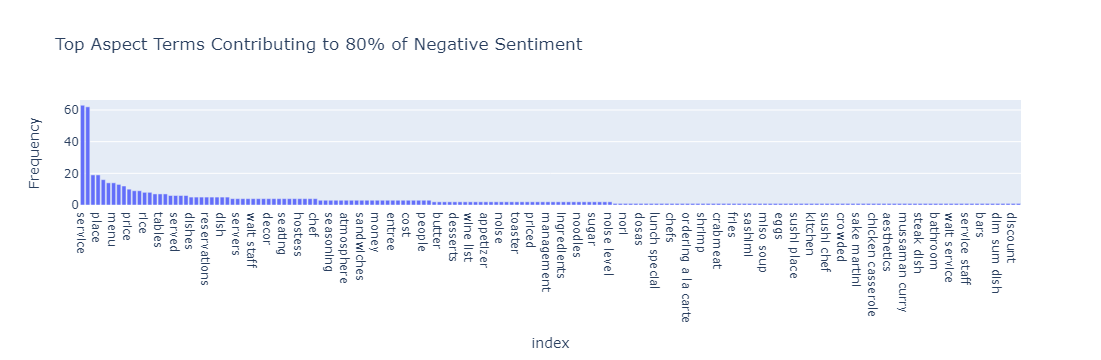

In [71]:
# Extract negative aspect terms and their counts
negative_terms = []
for sample in data:
    for aspect in sample['aspects']:
        if aspect['polarity'] == 'negative':
            negative_terms.append(aspect['term'].lower())

# Count frequency of negative aspect terms
negative_term_counts = pd.Series(negative_terms).value_counts()

# Calculate cumulative percentage
cumulative_percentage = negative_term_counts.cumsum() / negative_term_counts.sum()

# Apply the 80/20 rule
top_80_percent_terms = negative_term_counts[cumulative_percentage <= 0.8]

# Plot the chart
fig = px.bar(top_80_percent_terms, x=top_80_percent_terms.index, y=top_80_percent_terms.values,
             title='Top Aspect Terms Contributing to 80% of Negative Sentiment',
             labels={'x': 'Aspect Terms', 'y': 'Frequency'})

# Customize hover template to show count and cumulative percentage
hover_template = 'Term: %{x}<br>Count: %{y}<br>Cumulative %: %{customdata:.2f}%<extra></extra>'
fig.update_traces(customdata=cumulative_percentage[cumulative_percentage <= 0.8], hovertemplate=hover_template)

# Show the plot
fig.show()


In [69]:
# Count the number of negative aspects in each review
review_neg_counts = []
for sample in data:
    neg_count = sum(1 for aspect in sample['aspects'] if aspect['polarity'] == 'negative')
    review_neg_counts.append((sample['text'], neg_count))

# Sort the reviews by the count of negative aspects in descending order
review_neg_counts_sorted = sorted(review_neg_counts, key=lambda x: x[1], reverse=True)

# Extract the top 10 most negative reviews
top_10_negative_reviews = [review for review, count in review_neg_counts_sorted[:10]]

# Print the top 10 negative reviews
for idx, review in enumerate(top_10_negative_reviews, start=1):
    print(f"Review {idx}: {review}")
    print("-----")


Review 1: Besides having the table we had been promised given to other restaurant patrons twice before we were actually seated, we were served dishes we hadn't ordered three times, received one of our orders 20 minutes after the rest of the table had been served (and that order was undercooked), and charged $45 more than we should have been on our bill.
-----
Review 2: On the other hand, if you are not fooled easily, you will find hundreds of restaurants that will give you service and ambiance that is on par with Alain Ducasse, and food that will outshine in presentaion, taste, choice, quality and quantity.
-----
Review 3: But don't ever order bacon late at nite (either platter or in sandwiches, for that matter don't from any take out place) as it is from the morning frying turns out hard almost like bacos, hurt my molars.
-----
Review 4: With so many good restaurants on the UWS, I don't need overpriced food, absurdly arrogant wait-staff who don't recognize they work at a glorified din